Welcome to my kernel in European Soccer Database 

in this kernel i have used sqlite for preparing some data for work, and with pandas i have done some analysis and visualizations.

if you have any suggest,advice or correction please don't hesitate to write it, i think it will be very helpful for me.

we will go through these topics:


            1- Real Madrid Statistics
            2- countries and their leagues
            3- Top 5 players in different categories
            4- Cristiano Ronaldo vs Lionel Messi






In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

database = '../input/soccer/database.sqlite'


In [2]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
Player_Attributes = pd.read_sql("""SELECT * 
                        FROM Player_Attributes
                        """, conn)
Player = pd.read_sql("""SELECT * 
                        FROM Player
                        """, conn)
Match = pd.read_sql("""SELECT * 
                        FROM Match
                        """, conn)
League = pd.read_sql("""SELECT * 
                        FROM League
                        """, conn)
Country = pd.read_sql("""SELECT * 
                        FROM Country
                        """, conn)
Team = pd.read_sql("""SELECT * 
                        FROM Team
                        """, conn)
Team_Attributes = pd.read_sql("""SELECT * 
                        FROM Team_Attributes
                        """, conn)

In [4]:
print("Team")
print(Team.shape)
print(Team.columns)
print("-"*100)

print("League")
print(League.shape)
print(League.columns)
print("-"*100)

print("Country")
print(Country.shape)
print(Country.columns)
print("-"*100)

print("Player_Attributes")
print(Player_Attributes.shape)
print(Player_Attributes.columns)
print("-"*100)

print("Team_Attributes")
print(Team_Attributes.shape)
print(Team_Attributes.columns)
print("-"*100)

print("Match")
print(Match.shape)
print(Match.columns)
print("-"*100)

print("Player")
print(Player.shape)
print(Player.columns)

Team
(299, 5)
Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')
----------------------------------------------------------------------------------------------------
League
(11, 3)
Index(['id', 'country_id', 'name'], dtype='object')
----------------------------------------------------------------------------------------------------
Country
(11, 2)
Index(['id', 'name'], dtype='object')
----------------------------------------------------------------------------------------------------
Player_Attributes
(183978, 42)
Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_powe

In [5]:
Player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


## 1- Real Madrid Statistics

In [6]:
Team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [7]:
pd.set_option('display.max_columns', None)

Team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [8]:
Real_Madrid_Statistics = pd.read_sql("""SELECT *
 
                                        FROM Team 

                                        left join Team_Attributes
                                        
                                        on Team_Attributes.team_api_id = Team.team_api_id
                                        
                                        where team_long_name= "Real Madrid CF"
                                        
                        
                        """, conn)
Real_Madrid_Statistics

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,43040,8633,243,Real Madrid CF,REA,1049,243,8633,2010-02-22 00:00:00,55,Balanced,NaN,Little,30,Short,Free Form,70,Risky,60,Normal,70,Lots,Free Form,65,Medium,40,Press,65,Normal,Offside Trap
1,43040,8633,243,Real Madrid CF,REA,1050,243,8633,2011-02-22 00:00:00,54,Balanced,NaN,Little,39,Mixed,Free Form,67,Risky,60,Normal,67,Lots,Free Form,68,High,55,Press,55,Normal,Cover
2,43040,8633,243,Real Madrid CF,REA,1051,243,8633,2012-02-22 00:00:00,45,Balanced,NaN,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form,49,Medium,60,Press,68,Wide,Cover
3,43040,8633,243,Real Madrid CF,REA,1052,243,8633,2013-09-20 00:00:00,50,Balanced,NaN,Little,41,Mixed,Organised,68,Risky,54,Normal,72,Lots,Free Form,39,Medium,49,Press,65,Normal,Cover
4,43040,8633,243,Real Madrid CF,REA,1053,243,8633,2014-09-19 00:00:00,50,Balanced,54.0,Normal,41,Mixed,Organised,68,Risky,54,Normal,69,Lots,Free Form,39,Medium,49,Press,65,Normal,Cover
5,43040,8633,243,Real Madrid CF,REA,1054,243,8633,2015-09-10 00:00:00,50,Balanced,57.0,Normal,46,Mixed,Free Form,61,Normal,41,Normal,63,Normal,Free Form,52,Medium,60,Press,63,Normal,Cover


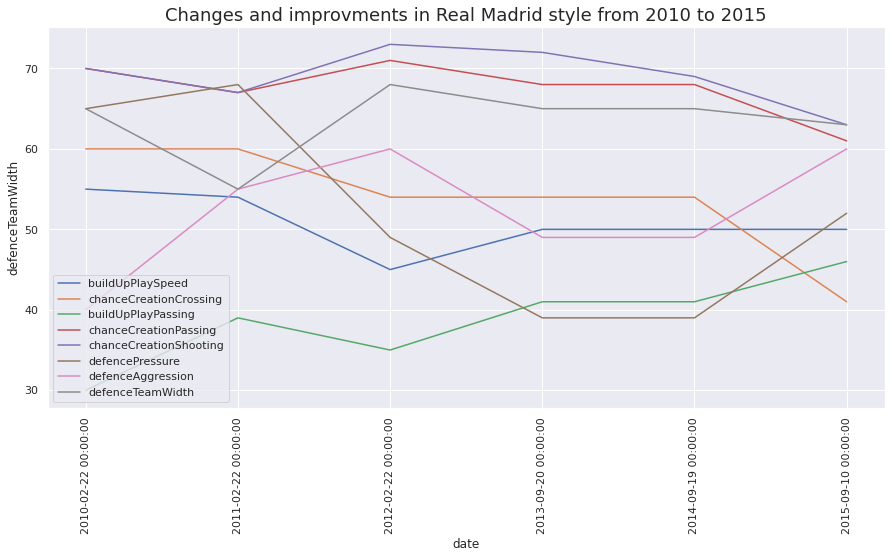

In [9]:
plt.figure(figsize=(15, 7))

sns.lineplot(x="date",y="buildUpPlaySpeed",data=Real_Madrid_Statistics, label="buildUpPlaySpeed").set_title("Changes and improvments in Real Madrid style from 2010 to 2015", fontsize=18)
sns.lineplot(x="date",y="chanceCreationCrossing",data=Real_Madrid_Statistics, label="chanceCreationCrossing")
sns.lineplot(x="date",y="buildUpPlayPassing",data=Real_Madrid_Statistics, label="buildUpPlayPassing")
sns.lineplot(x="date",y="chanceCreationPassing",data=Real_Madrid_Statistics, label="chanceCreationPassing")
sns.lineplot(x="date",y="chanceCreationShooting",data=Real_Madrid_Statistics, label="chanceCreationShooting")
sns.lineplot(x="date",y="defencePressure",data=Real_Madrid_Statistics, label="defencePressure")
sns.lineplot(x="date",y="defenceAggression",data=Real_Madrid_Statistics, label="defenceAggression")
sns.lineplot(x="date",y="defenceTeamWidth",data=Real_Madrid_Statistics, label="defenceTeamWidth")



plt.tick_params(axis='x', rotation=90)


In [10]:
Matchs_results = pd.read_sql("""SELECT Match.id
                            ,Country.name  country_name
                            ,League.name  League_name
                            ,date
                            ,season
                            ,Home_team.team_long_name  Home_team
                            ,away_team.team_long_name  away_team
                            ,home_team_goal
                            ,away_team_goal

 
                        FROM Country 
                        
                        join Match
                        on Country.id = Match.Country_id
                        
                        join League
                        on Country.id = League.Country_id
                        
                        LEFT JOIN Team AS Home_team 
                        on Home_team.team_api_id = Match.home_team_api_id
                        
                        LEFT JOIN Team AS away_team 
                        on away_team.team_api_id = Match.away_team_api_id
                        
                        """, conn)

Matchs_results

,id,country_name,League_name,date,season,Home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008-08-17 00:00:00,2008/2009,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008-08-17 00:00:00,2008/2009,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,FCV Dender EH,Standard de Liège,1,3
...,...,...,...,...,...,...,...,...,...
25974,25975,Switzerland,Switzerland Super League,2015-09-22 00:00:00,2015/2016,FC St. Gallen,FC Thun,1,0
25975,25976,Switzerland,Switzerland Super League,2015-09-23 00:00:00,2015/2016,FC Vaduz,FC Luzern,1,2
25976,25977,Switzerland,Switzerland Super League,2015-09-23 00:00:00,2015/2016,Grasshopper Club Zürich,FC Sion,2,0
25977,25978,Switzerland,Switzerland Super League,2015-09-22 00:00:00,2015/2016,Lugano,FC Zürich,0,0


In [11]:
home_RM = Matchs_results[Matchs_results["Home_team"] == "Real Madrid CF"]
away_RM = Matchs_results[Matchs_results["away_team"] == "Real Madrid CF"]
home_RM['match_result'] = np.where(home_RM['home_team_goal'] > home_RM['away_team_goal'], 'win', 'lose')
home_RM['match_result'] = np.where(home_RM['home_team_goal'] == home_RM['away_team_goal'], 'draw', home_RM['match_result'])

away_RM['match_result'] = np.where(away_RM['home_team_goal'] < away_RM['away_team_goal'], 'win', 'lose')
away_RM['match_result'] = np.where(away_RM['home_team_goal'] == away_RM['away_team_goal'], 'draw', away_RM['match_result'])


RM = pd.concat([home_RM, away_RM])
RM

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,id,country_name,League_name,date,season,Home_team,away_team,home_team_goal,away_team_goal,match_result
21533,21534,Spain,Spain LIGA BBVA,2008-11-08 00:00:00,2008/2009,Real Madrid CF,Málaga CF,4,3,win
21554,21555,Spain,Spain LIGA BBVA,2008-11-22 00:00:00,2008/2009,Real Madrid CF,RC Recreativo,1,0,win
21575,21576,Spain,Spain LIGA BBVA,2008-12-07 00:00:00,2008/2009,Real Madrid CF,Sevilla FC,3,4,lose
21593,21594,Spain,Spain LIGA BBVA,2008-12-20 00:00:00,2008/2009,Real Madrid CF,Valencia CF,1,0,win
21603,21604,Spain,Spain LIGA BBVA,2009-01-04 00:00:00,2008/2009,Real Madrid CF,Villarreal CF,1,0,win
...,...,...,...,...,...,...,...,...,...,...
24467,24468,Spain,Spain LIGA BBVA,2016-04-30 00:00:00,2015/2016,Real Sociedad,Real Madrid CF,0,1,win
24488,24489,Spain,Spain LIGA BBVA,2016-05-14 00:00:00,2015/2016,RC Deportivo de La Coruña,Real Madrid CF,0,2,win
24512,24513,Spain,Spain LIGA BBVA,2015-09-23 00:00:00,2015/2016,Athletic Club de Bilbao,Real Madrid CF,1,2,win
24531,24532,Spain,Spain LIGA BBVA,2015-10-04 00:00:00,2015/2016,Atlético Madrid,Real Madrid CF,1,1,draw


Text(0.5, 1.0, "Real Madrid match's results from 2008 to 2015")

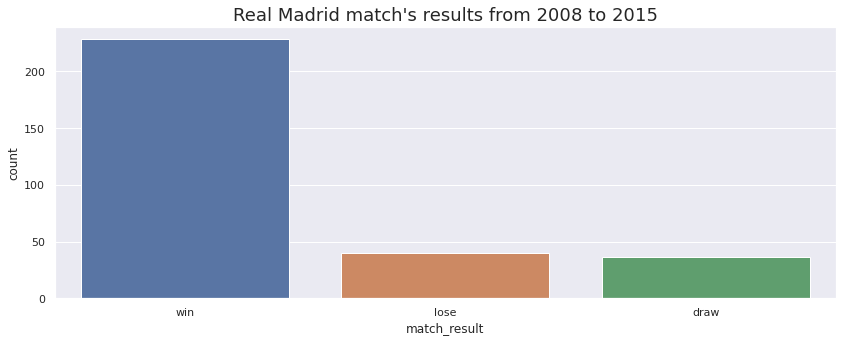

In [12]:
plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=RM ).set_title("Real Madrid match's results from 2008 to 2015", fontsize=18)


In [13]:
goals_scored = home_RM['home_team_goal'].sum() + away_RM['away_team_goal'].sum()
goals_conceded = home_RM["away_team_goal"].sum() + home_RM['home_team_goal'].sum()
print("Real Madrid goals scored from 2008 to 2015 :  " ,   goals_scored)
print("Real Madrid goals conceded from 2008 to 2015 :" , goals_conceded)

Real Madrid goals scored from 2008 to 2015 :   843
Real Madrid goals conceded from 2008 to 2015 : 652


## 2- countries and their leagues

In [14]:
Country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [15]:
co_ord = pd.read_csv("../input/world-coordinates/world_coordinates.csv")

co_ord

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615
...,...,...,...,...
239,YE,Yemen,15.552727,48.516388
240,YT,Mayotte,-12.827500,45.166244
241,ZA,South Africa,-30.559482,22.937506
242,ZM,Zambia,-13.133897,27.849332


In [16]:
new_row_1 = {'Code':'ENG', 'Country':"England", 'latitude':52.3555, 'longitude':1.1743}
new_row_2 = {'Code':'SCT', 'Country':"Scotland", 'latitude':56.8642, 'longitude':-4.2026}

#new_row_1 = {'Code':'ENG', 'Country':"England", 'latitude':1.1743, 'longitude':52.3555}
#new_row_2 = {'Code':'SCT', 'Country':"Scotland", 'latitude':4.2026, 'longitude':56.4907}

co_ord = co_ord.append(new_row_1, ignore_index=True)
co_ord = co_ord.append(new_row_2, ignore_index=True)
maping = co_ord[co_ord["Country"].isin(Country["name"])]
maping


,Code,Country,latitude,longitude
19,BE,Belgium,50.503887,4.469936
40,CH,Switzerland,46.818188,8.227512
53,DE,Germany,51.165691,10.451526
64,ES,Spain,40.463667,-3.749220
71,FR,France,46.227638,2.213749
107,IT,Italy,41.871940,12.567380
162,NL,Netherlands,52.132633,5.291266
175,PL,Poland,51.919438,19.145136
180,PT,Portugal,39.399872,-8.224454
244,ENG,England,52.355500,1.174300


In [17]:

maping = maping.assign(League_name = ['Belgium Jupiler League'
                                   ,'Switzerland Super League'
                                   ,'Germany 1. Bundesliga'
                                   ,'Spain LIGA BBVA'
                                   ,'France Ligue 1'
                                   ,'Italy Serie A'
                                   ,'Netherlands Eredivisie'
                                   ,'Poland Ekstraklasa'
                                   ,'Portugal Liga ZON Sagres'
                                   ,'England Premier League'
                                   ,'Scotland Premier League'])

maping

,Code,Country,latitude,longitude,League_name
19,BE,Belgium,50.503887,4.469936,Belgium Jupiler League
40,CH,Switzerland,46.818188,8.227512,Switzerland Super League
53,DE,Germany,51.165691,10.451526,Germany 1. Bundesliga
64,ES,Spain,40.463667,-3.749220,Spain LIGA BBVA
71,FR,France,46.227638,2.213749,France Ligue 1
107,IT,Italy,41.871940,12.567380,Italy Serie A
162,NL,Netherlands,52.132633,5.291266,Netherlands Eredivisie
175,PL,Poland,51.919438,19.145136,Poland Ekstraklasa
180,PT,Portugal,39.399872,-8.224454,Portugal Liga ZON Sagres
244,ENG,England,52.355500,1.174300,England Premier League


In [18]:
import folium
incidents = folium.Map(location=[54.5260, 15.2551], zoom_start=3.4,tiles='Stamen Terrain')

## loop through the 100 crimes and add each to the incidents feature group
for lat, log,Country,League in zip( maping["latitude"],maping["longitude"],maping["Country"],maping["League_name"]):
    
    folium.CircleMarker(
            [lat, log],
            radius=15,
            popup = ('<strong>name</strong>: ' + str(League) + '<br>'
                     '<strong>Nationality</strong>: ' + str(Country).capitalize()), 
              # define how big you want the circle markers to be
            color='yellow',
            fill_color='yellow',
            fill_opacity=0.7
        ).add_to(incidents)
    

# add incidents to map
incidents

## 3- Top 5 players in different categories

In [19]:
pd.set_option('display.max_columns', None)

Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [20]:
Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [21]:
all_players = pd.read_sql("""SELECT player_name
                                    ,birthday
                                    ,date
                                    ,overall_rating
                                    ,height
                                    ,attacking_work_rate
                                    ,crossing
                                    ,finishing
                                    ,shot_power
                                    ,heading_accuracy
                                    ,sprint_speed,agility
                                    ,defensive_work_rate
                                    ,preferred_foot
                                    ,free_kick_accuracy
                                    ,penalties
                                    
                                    
                        FROM Player 
                        LEFT JOIN Player_Attributes
                        on Player.player_api_id = Player_Attributes.player_api_id
                                                
                        where date LIKE '2015%'
                       
                        ORDER by date
                        """, conn)



pd.set_option('display.max_columns', None)
all_players.head()

,player_name,birthday,date,overall_rating,height,attacking_work_rate,crossing,finishing,shot_power,heading_accuracy,sprint_speed,agility,defensive_work_rate,preferred_foot,free_kick_accuracy,penalties
0,Aaron Wilbraham,1979-10-21 00:00:00,2015-01-02 00:00:00,65.0,190.50,medium,48.0,66.0,68.0,77.0,57.0,44.0,medium,right,41.0,72.0
1,Abdoulaye Diaby,1991-05-21 00:00:00,2015-01-02 00:00:00,69.0,172.72,medium,65.0,73.0,62.0,65.0,88.0,80.0,medium,right,48.0,62.0
2,Adam Morgan,1994-04-21 00:00:00,2015-01-02 00:00:00,61.0,177.80,high,41.0,61.0,61.0,54.0,78.0,70.0,low,left,42.0,66.0
3,Adlene Guedioura,1985-11-12 00:00:00,2015-01-02 00:00:00,67.0,177.80,medium,61.0,62.0,81.0,63.0,75.0,72.0,high,right,55.0,56.0
4,Albert Rusnak,1994-07-07 00:00:00,2015-01-02 00:00:00,67.0,180.34,high,40.0,50.0,59.0,38.0,73.0,84.0,medium,right,73.0,53.0


Text(0.5, 1.0, 'preferred foot count in 2015')

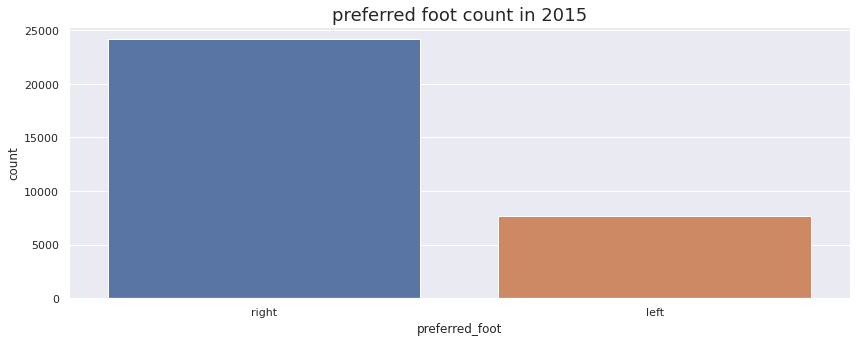

In [22]:
plt.figure(figsize=(14, 5))

sns.countplot("preferred_foot",data=all_players ).set_title("preferred foot count in 2015", fontsize=18)


In [23]:
print("Player_Attributes")
print(Player_Attributes.columns)
print("-"*100)

Player_Attributes
Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'top 5 PK accuracy players in 2015')

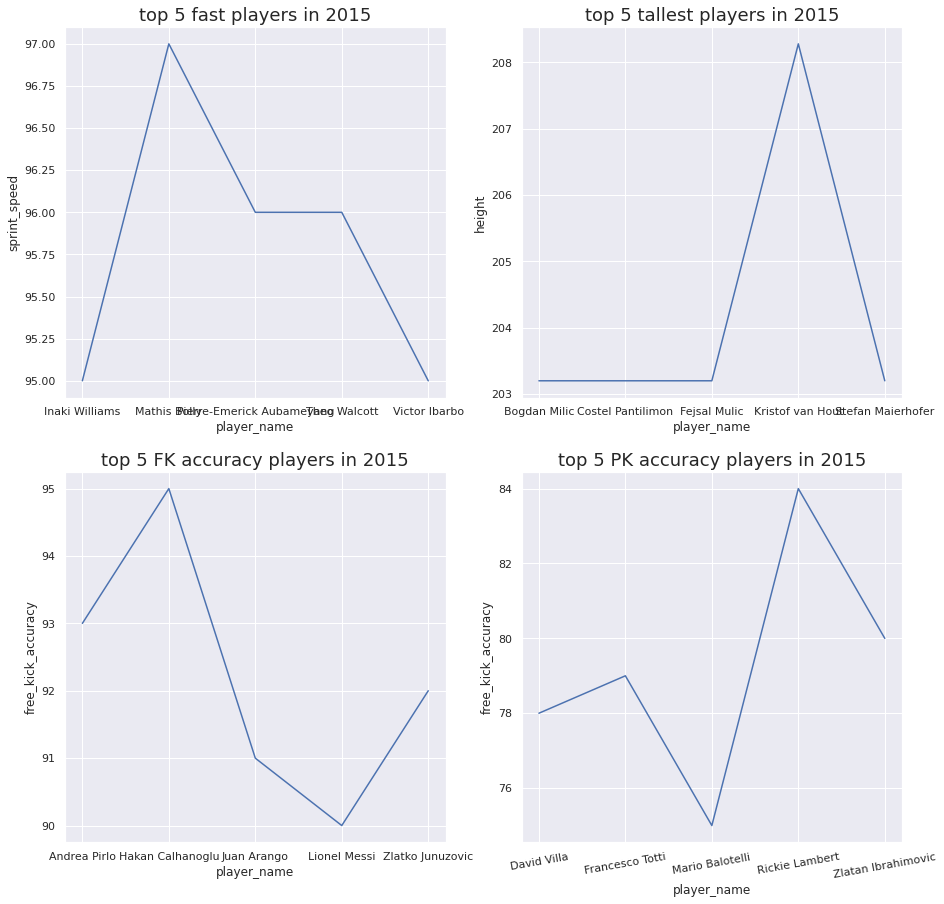

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[15, 15])
plt.tick_params(axis='x', rotation=10)

fast = all_players.sort_values(by=['sprint_speed'], ascending=False)
fast = fast.drop_duplicates(subset='player_name', keep="first")
fast = fast.head()
sns.lineplot(x="player_name",y="sprint_speed",data=fast ,ax = axes[0,0]).set_title("top 5 fast players in 2015", fontsize=18)



highst = all_players.sort_values(by=['height'], ascending=False)
highst = highst.drop_duplicates(subset='player_name', keep="first")
highst = highst.head()
sns.lineplot(x="player_name",y="height",data=highst ,ax = axes[0,1]).set_title("top 5 tallest players in 2015", fontsize=18)



FK_best = all_players.sort_values(by=['free_kick_accuracy'], ascending=False)
FK_best = FK_best.drop_duplicates(subset='player_name', keep="first")
FK_best = FK_best.head()
sns.lineplot(x="player_name",y="free_kick_accuracy",data=FK_best ,ax = axes[1,0]).set_title("top 5 FK accuracy players in 2015", fontsize=18)



PK_best = all_players.sort_values(by=['penalties'], ascending=False)
PK_best = PK_best.drop_duplicates(subset='player_name', keep="first")
PK_best = PK_best.head()
sns.lineplot(x="player_name",y="free_kick_accuracy",data=PK_best ,ax = axes[1,1]).set_title("top 5 PK accuracy players in 2015", fontsize=18)



## 4- Cristiano Ronaldo vs Lionel Messi

Now, it's time for the G.O.A.T. rivaly 

In [25]:
Cristiano = pd.read_sql("""SELECT player_name
                                    ,date
                                    ,overall_rating
                                    ,attacking_work_rate
                                    ,crossing
                                    ,finishing
                                    ,shot_power
                                    ,heading_accuracy
                                    ,free_kick_accuracy
                                    ,sprint_speed,agility
                                    
                        FROM Player 
                        LEFT JOIN Player_Attributes
                        on Player.player_api_id = Player_Attributes.player_api_id
                        
                        WHERE player_name = 'Cristiano Ronaldo'
                        
                       
                        ORDER by date
                        """, conn)



pd.set_option('display.max_columns', None)
Cristiano.head()

,player_name,date,overall_rating,attacking_work_rate,crossing,finishing,shot_power,heading_accuracy,free_kick_accuracy,sprint_speed,agility
0,Cristiano Ronaldo,2007-02-22 00:00:00,87,high,80,71,80,74,64,93,94
1,Cristiano Ronaldo,2007-08-30 00:00:00,91,high,88,85,90,84,88,94,94
2,Cristiano Ronaldo,2008-08-30 00:00:00,91,high,89,92,92,82,94,94,94
3,Cristiano Ronaldo,2009-02-22 00:00:00,90,high,89,91,90,82,93,94,94
4,Cristiano Ronaldo,2009-08-30 00:00:00,89,high,86,90,91,88,88,92,94


Text(0.5, 1.0, 'Cristiano Ronaldo from 2008 to 2015')

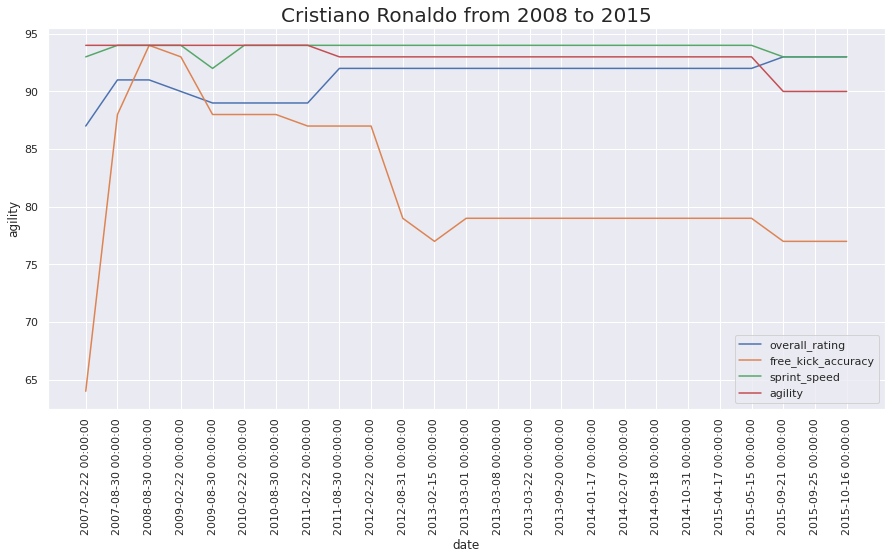

In [26]:
plt.figure(figsize=(15, 7))

sns.lineplot(Cristiano['date'], Cristiano["overall_rating"], palette = 'Wistia', label="overall_rating")
sns.lineplot(Cristiano['date'], Cristiano["free_kick_accuracy"], palette = 'Wistia', label="free_kick_accuracy")
sns.lineplot(Cristiano['date'], Cristiano["sprint_speed"], palette = 'Wistia', label="sprint_speed")
sns.lineplot(Cristiano['date'], Cristiano["agility"], palette = 'Wistia', label="agility")

plt.tick_params(axis='x', rotation=90)
plt.title("Cristiano Ronaldo from 2008 to 2015", fontsize=20)

In [27]:
Messi = pd.read_sql("""SELECT player_name
                                    ,date
                                    ,overall_rating
                                    ,attacking_work_rate
                                    ,crossing
                                    ,finishing
                                    ,shot_power
                                    ,heading_accuracy
                                    ,free_kick_accuracy
                                    ,sprint_speed,agility
                                    
                        FROM Player 
                        LEFT JOIN Player_Attributes
                        on Player.player_api_id = Player_Attributes.player_api_id
                        
                        WHERE player_name = 'Lionel Messi'
                        
                       
                        ORDER by  date
                        """, conn)



pd.set_option('display.max_columns', None)
Messi.head()

,player_name,date,overall_rating,attacking_work_rate,crossing,finishing,shot_power,heading_accuracy,free_kick_accuracy,sprint_speed,agility
0,Lionel Messi,2007-02-22 00:00:00,85,high,85,76,83,59,87,94,96
1,Lionel Messi,2007-08-30 00:00:00,86,high,83,80,84,63,70,95,96
2,Lionel Messi,2008-08-30 00:00:00,90,high,81,87,82,64,70,95,96
3,Lionel Messi,2009-02-22 00:00:00,90,high,81,87,79,64,76,93,96
4,Lionel Messi,2009-08-30 00:00:00,90,high,82,90,79,64,74,93,96


Text(0.5, 1.0, 'Lionel Messi from 2008 to 2015')

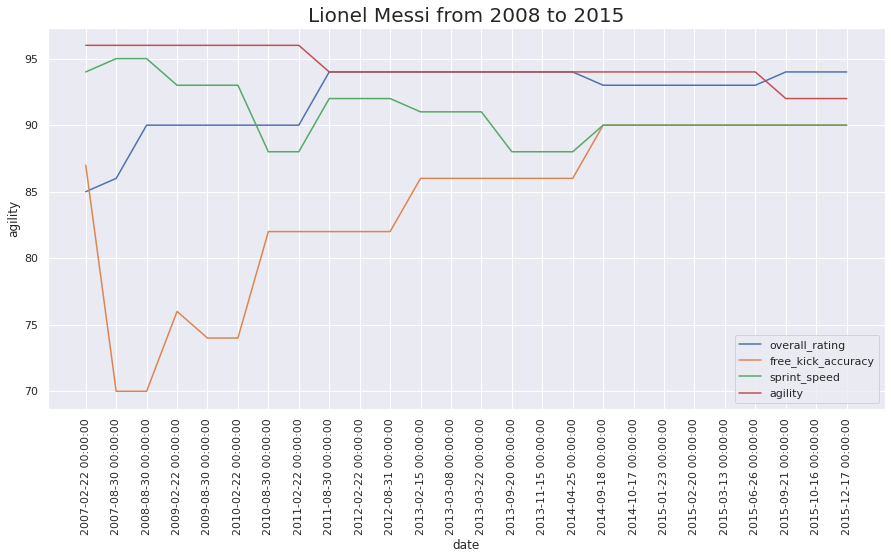

In [28]:
plt.figure(figsize=(15, 7))

sns.lineplot(Messi['date'], Messi["overall_rating"], palette = 'Wistia', label="overall_rating")
sns.lineplot(Messi['date'], Messi["free_kick_accuracy"], palette = 'Wistia', label="free_kick_accuracy")
sns.lineplot(Messi['date'], Messi["sprint_speed"], palette = 'Wistia', label="sprint_speed")
sns.lineplot(Messi['date'], Messi["agility"], palette = 'Wistia', label="agility")

plt.tick_params(axis='x', rotation=90)
plt.title("Lionel Messi from 2008 to 2015", fontsize=20)